<a href="https://colab.research.google.com/github/Jacqueline45/EE559_Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# fig, axes = plt.subplots(figsize=(16, 12))
# plot = sns.boxplot(data=x4[high_index],ax=axes)
# plt.xticks(rotation=30)
# plt.show()

In [2]:
!unzip /content/EE559_Project-main.zip

Archive:  /content/EE559_Project-main.zip
cd4e0a51e0b87e7bb5bd032f2efedcc9a0da1845
   creating: EE559_Project-main/
  inflating: EE559_Project-main/.DS_Store  
 extracting: EE559_Project-main/.gitignore  
  inflating: EE559_Project-main/Feature_Selection.py  
  inflating: EE559_Project-main/MSE.py  
  inflating: EE559_Project-main/README.md  
  inflating: EE559_Project-main/baseline.py  
   creating: EE559_Project-main/cf_matrix_plots/
  inflating: EE559_Project-main/cf_matrix_plots/MSE.png  
  inflating: EE559_Project-main/cf_matrix_plots/MSE_val.png  
  inflating: EE559_Project-main/cf_matrix_plots/baseline_system.png  
  inflating: EE559_Project-main/cf_matrix_plots/baseline_system_val.png  
  inflating: EE559_Project-main/cf_matrix_plots/kNN_SMOTE_k=5.png  
  inflating: EE559_Project-main/cf_matrix_plots/kNN_SMOTE_k=7.png  
  inflating: EE559_Project-main/cf_matrix_plots/kNN_add_1_feat_k=5.png  
  inflating: EE559_Project-main/cf_matrix_plots/kNN_add_1_feat_k=7.png  
  inflating: E

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [15]:
fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

fires_trainx = fires_train.iloc[:,1:-1]
fires_trainy = fires_train.iloc[:,-1]
fires_testx = fires_test.iloc[:,1:-1]
fires_testy = fires_test.iloc[:,-1]

scalar = MinMaxScaler()

fires = scalar.fit_transform(fires_trainx)
firestst = scalar.fit_transform(fires_testx)

In [17]:
def metrics(true_labels, pred_labels, plot_title, work='test'):
    cf_matrix = confusion_matrix(true_labels, pred_labels)
    TP, TN, FP, FN = cf_matrix[1][1], cf_matrix[0][0], cf_matrix[0][1], cf_matrix[1][0]
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    F1_score = 2*Recall*Precision/(Recall+Precision)
    Accuracy = (TP+TN)/true_labels.shape[0]
    
    if work == 'test':
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title(plot_title)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values ')

        ax.xaxis.set_ticklabels(['0','1'])
        ax.yaxis.set_ticklabels(['0','1'])

        plt.savefig('/content/EE559_Project-main/cf_matrix_plots/'+plot_title+'.png')

        return F1_score, Accuracy

    else:
        return F1_score, Accuracy, TP, TN, FP, FN

In [18]:
import statsmodels.api as sm
import pandas as pd

X = sm.add_constant(fires_trainx)
log_reg = sm.Logit(fires_trainy, X)
log1 = log_reg.fit(method = "cg")
print(log1.summary())

         Current function value: 0.245380
         Iterations: 35
         Function evaluations: 66
         Gradient evaluations: 66
                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  184
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            9
Date:                Sun, 01 May 2022   Pseudo R-squ.:                  0.6291
Time:                        20:02:57   Log-Likelihood:                -45.150
converged:                      False   LL-Null:                       -121.73
Covariance Type:            nonrobust   LLR p-value:                 1.956e-28
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0270      1.395     -0.019      0.985      -2.761       

In [ ]:
#Taking all features

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

logreg = LogisticRegression()
logreg.fit(fires_trainx, fires_trainy)
Y_pred = logreg.predict(fires_trainx)
val=logreg.score(fires_trainx,fires_trainy)
print("Accuracy for train:",val)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy, Y_pred)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Train Logistic regression F1_score= 0.9385964912280702 Train Logistic regression Accuracy= 0.9239130434782609


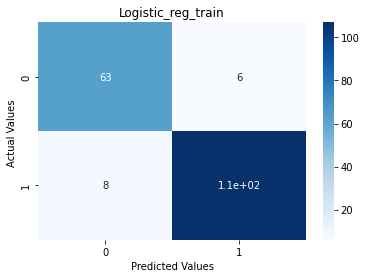

In [28]:
F1_score, Accuracy = metrics(fires_trainy,Y_pred, "Logistic_reg_train")
print("Train Logistic regression F1_score=", F1_score, "Train Logistic regression Accuracy=", Accuracy)

In [ ]:
#Taking all features
Y_predtst = logreg.predict(fires_testx)
val=logreg.score(fires_testx,fires_testy)
print("Accuracy for test:",val)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy, Y_predtst)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual Test label');
plt.xlabel('Predicted Test label');

Test Logistic regression F1_score= 0.8260869565217391 Test Logistic regression Accuracy= 0.8666666666666667


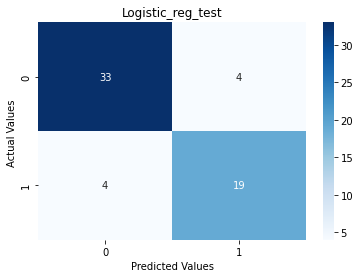

In [30]:
F1_score, Accuracy = metrics(fires_testy,Y_predtst, "Logistic_reg_test")
print("Test Logistic regression F1_score=", F1_score, "Test Logistic regression Accuracy=", Accuracy)


>If our p value is less than 0.05 then we reject the null hypothesis 
And if you see we are getting a p value of 0.00, that means the 'ISI' is the best feature for the calculation so we will drop the others and predict logistic regression on just ISI Feature and See what it results.

In [31]:
#Only ISI
df = pd.read_csv('/content/EE559_Project-main/datasets/algerian_fires_train.csv', usecols=['ISI'])
dftst = pd.read_csv('/content/EE559_Project-main/datasets/algerian_fires_test.csv', usecols=['ISI'])

Accuracy for train for Only ISI: 0.9130434782608695
--------------------------
[[ 62   7]
 [  9 106]]
Accuracy for test only ISI: 0.8666666666666667
--------------------------
[[33  4]
 [ 4 19]]


<Figure size 432x288 with 0 Axes>

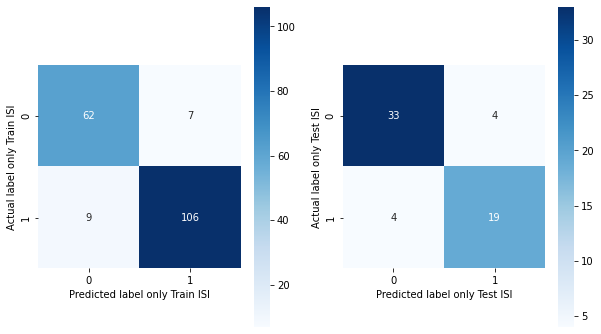

In [37]:
from sklearn.metrics import accuracy_score

plt.tight_layout()

plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
logreg = LogisticRegression()
logreg.fit(df, fires_trainy)
Y_pred = logreg.predict(df)
val=accuracy_score(fires_trainy, Y_pred)
print("Accuracy for train for Only ISI:",val)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy, Y_pred)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label only Train ISI');
plt.xlabel('Predicted label only Train ISI');

plt.subplot(3,2,2)
Y_predtst = logreg.predict(dftst)
val3=accuracy_score(fires_testy, Y_predtst)
print("Accuracy for test only ISI:",val3)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy, Y_predtst)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label only Test ISI');
plt.xlabel('Predicted label only Test ISI');

In [38]:
#1drop temperature
fires_trainx_1 = fires_train.iloc[:,2:-1]
fires_trainy_1 = fires_train.iloc[:,-1]
fires_testx_1 = fires_test.iloc[:,2:-1]
fires_testy_1 = fires_test.iloc[:,-1]
#2drop Temp,RH
fires_trainx_2 = fires_train.iloc[:,3:-1]
fires_trainy_2 = fires_train.iloc[:,-1]
fires_testx_2 = fires_test.iloc[:,3:-1]
fires_testy_2 = fires_test.iloc[:,-1]

#3drop Temp,RH, Ws
fires_trainx_3 = fires_train.iloc[:,4:-1]
fires_trainy_3 = fires_train.iloc[:,-1]
fires_testx_3 = fires_test.iloc[:,4:-1]
fires_testy_3 = fires_test.iloc[:,-1]


Accuracy for train 1drop : 0.9239130434782609
--------------------------
[[ 63   6]
 [  8 107]]
Accuracy for test 1drop: 0.9
--------------------------
[[34  3]
 [ 3 20]]


<Figure size 432x288 with 0 Axes>

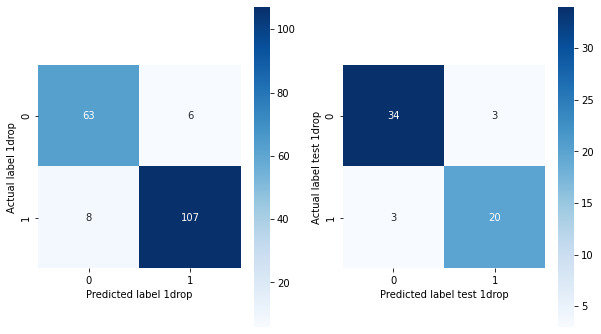

In [39]:
#1drop
###############Working 
from sklearn.metrics import accuracy_score
plt.tight_layout()
plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
logreg1 = LogisticRegression()
logreg1.fit(fires_trainx_1, fires_trainy_1)
Y_pred1 = logreg1.predict(fires_trainx_1)
val1=accuracy_score(fires_trainy_1, Y_pred1)
print("Accuracy for train 1drop :",val1)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy_1, Y_pred1)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label 1drop');
plt.xlabel('Predicted label 1drop');

plt.subplot(3,2,2)
Y_predtst1 = logreg1.predict(fires_testx_1)
val12=accuracy_score(fires_testy_1,Y_predtst1)
print("Accuracy for test 1drop:",val12)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy_1, Y_predtst1)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label test 1drop');
plt.xlabel('Predicted label test 1drop');

Accuracy for train 2drop : 0.9239130434782609
--------------------------
[[ 63   6]
 [  8 107]]
Accuracy for test 2drop: 0.8833333333333333
--------------------------
[[34  3]
 [ 4 19]]


<Figure size 432x288 with 0 Axes>

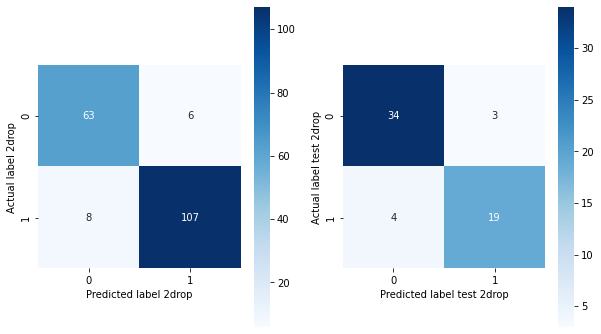

In [40]:
#2drop
plt.tight_layout()
plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
logreg2 = LogisticRegression()
logreg2.fit(fires_trainx_2, fires_trainy_2)
Y_pred2 = logreg2.predict(fires_trainx_2)
val2=logreg2.score(fires_trainx_2,fires_trainy_2)
print("Accuracy for train 2drop :",val2)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy_2, Y_pred2)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label 2drop');
plt.xlabel('Predicted label 2drop');

plt.subplot(3,2,2)
Y_predtst2 = logreg2.predict(fires_testx_2)
val1212=accuracy_score(fires_testy_2,Y_predtst2)
print("Accuracy for test 2drop:",val1212)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy_2, Y_predtst2)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label test 2drop');
plt.xlabel('Predicted label test 2drop');

Accuracy for train 3drop : 0.9293478260869565
--------------------------
[[ 63   6]
 [  7 108]]
Accuracy for test 3drop: 0.8666666666666667
--------------------------
[[33  4]
 [ 4 19]]


<Figure size 432x288 with 0 Axes>

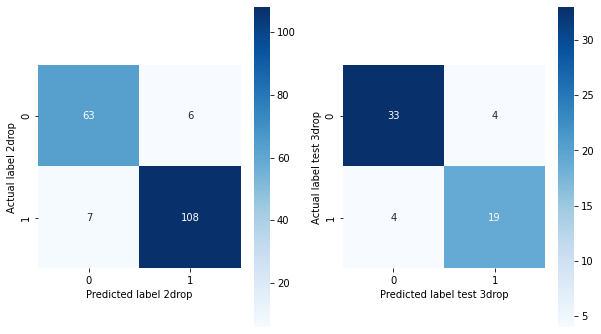

In [41]:
#3drop
plt.tight_layout()
plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
logreg3 = LogisticRegression()
logreg3.fit(fires_trainx_3, fires_trainy_3)
Y_pred3 = logreg3.predict(fires_trainx_3)
val3=logreg3.score(fires_trainx_3,fires_trainy_3)
print("Accuracy for train 3drop :",val3)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy_3, Y_pred3)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label 2drop');
plt.xlabel('Predicted label 2drop');

plt.subplot(3,2,2)
Y_predtst3 = logreg3.predict(fires_testx_3)
val121212=accuracy_score(fires_testy_3,Y_predtst3)
print("Accuracy for test 3drop:",val121212)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy_3, Y_predtst3)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label test 3drop');
plt.xlabel('Predicted label test 3drop');